# **Behavioral Cloning** 


---

**Behavioral Cloning Project**

The goals / steps of this project are the following:
* Use the simulator to collect data of good driving behavior
* Build, a convolution neural network in Keras that predicts steering angles from images
* Train and validate the model with a training and validation set
* Test that the model successfully drives around track one without leaving the road
* Summarize the results with a written report


[//]: # (Image References)

[image1]: ./examples/angles_hist.png "Histogram of steering angles"
[image2]: ./examples/hsv_views.png "HSV color channels"
[image3]: ./examples/cropped_img.png "Cropping2D result"
[image4]: ./examples/flipped_img.png "Flipped image"
[image5]: ./examples/camera_views.png "3 camera views"
[image6]: ./examples/training_plot.png "Plot of Train & Validation Loss"
[image7]: ./examples/angles_adj_hist.png "Histogram of adjusted steering angles"


## Rubric Points
Below discussion considers the [rubric points](https://review.udacity.com/#!/rubrics/432/view) individually and describes how they were addressed in my implementation.  

---
### Files Submitted & Code Quality

#### 1. Submission includes all required files and can be used to run the simulator in autonomous mode

My project includes the following files:
* model.py containing the script to create and train the model
* drive.py for driving the car in autonomous mode
* model.h5 containing a trained convolution neural network 
* writeup_report.md summarizing the results
* run1.mp4 video showing car driving autonomously around track one

#### 2. Submission includes functional code
Using the Udacity provided simulator and my drive.py file, the car can be driven autonomously around the track by executing 
```sh
python drive.py model.h5
```

#### 3. Submission code is usable and readable
- The `model.py` file contains the code for training and saving the convnet. The file shows the pipeline for training and validating the model.

- The `drive.py` file was modified to drive with `16` as the speed setting and convert camera images to HSV colorspace.

- The `Behavioral_Cloning_v1.ipynb` notebook shows how the model was created, along with additional commentary and data exploration.


### Model Architecture and Training Strategy

#### 1. An appropriate model architecture has been employed

The model uses a convolution neural network with 8x8 and 5x5 filter sizes and depths ranging from 16 - 64 (model.py lines 78-104) 
- The data is normalized using a `Lambda` layer (model.py lines 81-83). 
- The model includes a `Cropping2D` layer to reduce the image size and focus on the road portion (model.py lines 88). 
- The model uses 3 convolution layers and 2 fully connected layers.
- The model includes `ELU` layers to introduce nonlinearity and `Dropout` layers to prevent overfitting.
- The model outputs a single value that corresponds to the vehicle's steering angle. 

#### 2. Attempts to reduce overfitting in the model

The model contains dropout layers in order to reduce overfitting (model.py lines 98, 102). 

The model was trained and validated on sample data provided by Udacity (code line 57-61). 

The model was tested by running it through the simulator and ensuring that the vehicle could stay on the track. (see `run1.mp4` video file)

#### 3. Model parameter tuning

The model used an adam optimizer, so the learning rate was not tuned manually (model.py line 108).

Various network architectures were trained with numbers of epochs ranging from 2-10. The final network was trained with 10 epochs (model.py line 107), using early stopping (model.py line 109).

#### 4. Appropriate training data

After some experimentation with generating my own training data, the [sample data provided by Udacity](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584f6edd_data/data.zip) proved to be sufficient for the final implementation.


### Architecture and Training Documentation

#### 1. Solution Design Approach

The overall strategy for deriving a model architecture was to use the CommAI architecture and experiment with adding layers if results were not satisfactory.

In order to gauge how well the model was working, I split my image & steering angle data into training and validation sets. The below plot shows the loss from the final trained model.

![][image6]

To combat any overfitting, I also included early stopping so that the training was terminated if the validation loss didn't improve after a certain number of epochs. (final model used `patience=1`)

The final step was to run the simulator to see how well the car was driving around track one. Early versions of the model resulted in the vehicle falling off the track, so to improve the driving behavior these steps were experimented with:
- generate additional data of "recovery driving" from edges of the track
- adjust number of training epochs
- adding layers to the network
- adjusting rate of dropout
- adjusting image cropping
- randomly skip training of images with low or "zero" steering angle
- augment data with flipped images
- adjust image colorspace
- use left and right camera views instead of center view

Ultimately, using the left and right camera views to train the network (rather than using just the center camera view) proved to be the final improvement needed to generate a model that can drive the vehicle autonomously around the track without leaving the road.

#### 2. Final Model Architecture

The final model architecture is from [CommaAI](https://github.com/commaai/research/blob/master/train_steering_model.py) (model.py lines 78-104) and consists of the following layers and layer sizes...

```
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
lambda_1 (Lambda)                (None, 160, 320, 3)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
cropping2d_1 (Cropping2D)        (None, 80, 320, 3)    0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 20, 80, 16)    3088        cropping2d_1[0][0]               
____________________________________________________________________________________________________
elu_1 (ELU)                      (None, 20, 80, 16)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 10, 40, 32)    12832       elu_1[0][0]                      
____________________________________________________________________________________________________
elu_2 (ELU)                      (None, 10, 40, 32)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 5, 20, 64)     51264       elu_2[0][0]                      
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 6400)          0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 6400)          0           flatten_1[0][0]                  
____________________________________________________________________________________________________
elu_3 (ELU)                      (None, 6400)          0           dropout_1[0][0]                  
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 512)           3277312     elu_3[0][0]                      
____________________________________________________________________________________________________
dropout_2 (Dropout)              (None, 512)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
elu_4 (ELU)                      (None, 512)           0           dropout_2[0][0]                  
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1)             513         elu_4[0][0]                      
====================================================================================================
Total params: 3,345,009
Trainable params: 3,345,009
Non-trainable params: 0
```

#### 3. Creation of the Training Set & Training Process

The model was trained with sample data provided by Udacity, containing ~8000 car positions with 3 captured images per position (center, right, left). 

![][image5]

Below is a histogram of steering angles found in the dataset.

![][image1]

I experimented with flipping images and angles to augment the training data, but eventually just used the left and right camera images without any data augmentation. As an example, here is an image that has been flipped:  

![][image4]

I shuffled the data set and put 25% of the data into a validation set. Using both the left and right camera images resulted in ~12000 iamges for training, and ~4000 for validation.

![][image7]

I preprocessed the data by converting to HSV colorspace and normalizing to range -1.0 to 1.0.

![][image2]

Images were also cropped to size (80, 320, 3). Here's an example:

![][image3]

__Notes on the training process__:   
- I used the training data for the network to learn how to steer. The validation set helped determine if the model was over or under fitting. Training with 10 epochs was sufficient to produce a good result, after experimentation with training between 2-10 epochs with various model architectures.


- I used an adam optimizer so that manually training the learning rate wasn't necessary.


- I didn't do any training on track two, so it's likely that the model won't generalize well to other road types and is simply "memorizing" track one.


- As a final note, near the completion of the project I realized that by using keras with Theano backend resulted in my `Cropping2d` implementation to actually crop the _width_ of the input images (i.e., columns) rather than the top & bottom _rows_ of the images. Interestingly, the model was still able to learn how to drive autonomously around track one, perhaps by "memorizing" the sky or background objects near the top of the image. 

    Switching to TensorFlow backend required some additional tuning of the steering angle adjustments and training with more epochs to achieve a robust model.

## Load modules

In [1]:
import pickle
import numpy as np
import math
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os
import csv
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Fix error with TF and Keras
import tensorflow as tf
print('tensorflow: ', tf.__version__)
#tf.python.control_flow_ops = tf

from keras import __version__ as keras_version
print('keras: ', keras_version)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, ELU, Cropping2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import img_to_array, load_img
from keras.layers.convolutional import Convolution2D

print('Modules loaded.')

tensorflow:  0.12.1


Using TensorFlow backend.


keras:  1.2.1
Modules loaded.


## Set up training set and generator function

In [2]:
# Starter code from Udacity lesson on Generators

samples = []
with open('../sample-data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

if type(samples[0][0]) == str:
    samples = samples[1:]  # remove header row

train_samples, valid_samples = train_test_split(samples, test_size=0.25)

def generator(samples, batch_size=32):
    ''' Generate images and steering angle target
    Camera positions: center 0, left 1, right 2
    '''
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []
            for batch_sample in batch_samples:
                center_angle = float(batch_sample[3])   
                
                name = '../sample-data/IMG/'+batch_sample[1].split('/')[-1]
                left_image = cv2.imread(name)  # load img as BGR        
                left_image = cv2.cvtColor(left_image, cv2.COLOR_BGR2HSV)                
                images.append(left_image)
                angles.append(center_angle+0.25)
                
                name = '../sample-data/IMG/'+batch_sample[2].split('/')[-1]
                right_image = cv2.imread(name)  # load img as BGR        
                right_image = cv2.cvtColor(right_image, cv2.COLOR_BGR2HSV)                
                images.append(right_image)
                angles.append(center_angle-0.25)

            X_train = np.array(images)
            y_train = np.array(angles)
            yield shuffle(X_train, y_train)

# Compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=32)
valid_generator = generator(valid_samples, batch_size=32)


## Look at the data

### How many samples?

In [3]:
len(samples)

8036

### Histogram of steering angles
Most steering angles are 0.

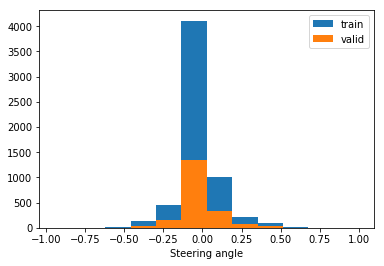

In [4]:
# Plot histogram of steering angles
train_angles = np.array(train_samples)[:,3].astype(float)
valid_angles = np.array(valid_samples)[:,3].astype(float)
plt.hist(train_angles, 12, label='train')
plt.hist(valid_angles, 12, label='valid')
plt.xlabel('Steering angle')
plt.legend();

### Histogram of "adjusted" steering angles for left & right cameras
Now most steering angles are non-zero.

In [8]:
np.concatenate((train_angles,train_angles)).shape

(12054,)

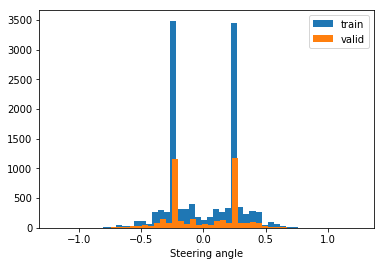

In [37]:
# adjust the steering angles
train_angles_adj = np.concatenate((train_angles-0.25, train_angles+0.25))
valid_angles_adj = np.concatenate((valid_angles-0.25, valid_angles+0.25))

# Plot histogram of adjusted steering angles
plt.hist(train_angles_adj, 50, label='train')
plt.hist(valid_angles_adj, 50, label='valid')
plt.xlabel('Steering angle')
plt.legend();

### Look at the 3 cameras views

angle:   0.1478767


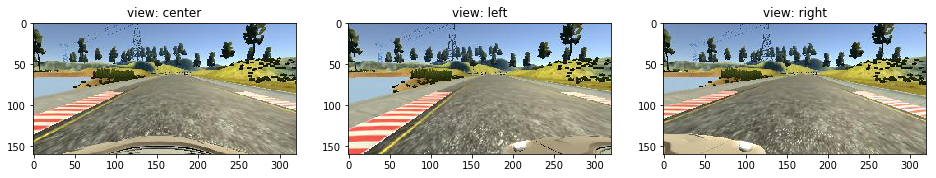

In [11]:
# Look at a random training image
n = np.random.randint(len(samples))
sample = samples[n]

views = ['center', 'left', 'right']
print('angle: ', sample[3])
plt.figure(figsize=(16,4))
for i in range(3):
    img_name = '../sample-data/IMG/'+sample[i].split('/')[-1]
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1,3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title('view: {}'.format(views[i]))

### Color conversion
We will use HSV color space.

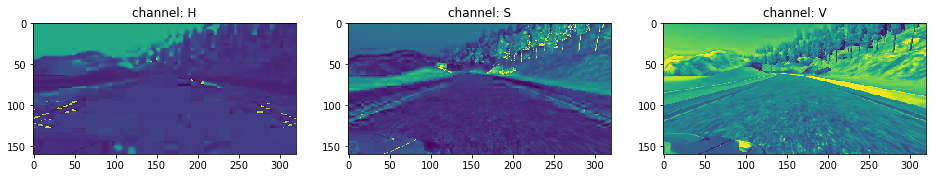

In [81]:
img = cv2.imread(img_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

views = ['H', 'S', 'V']
plt.figure(figsize=(16,4))
for i in range(3):
    img_name = '../sample-data/IMG/'+sample[i].split('/')[-1]
    plt.subplot(1,3, i+1)
    plt.imshow(img[:,:,i])
    plt.title('channel: {}'.format(views[i]))

### Flipped images
Flipping the images is a good idea to augment the data, but wasn't used in the final implementation.

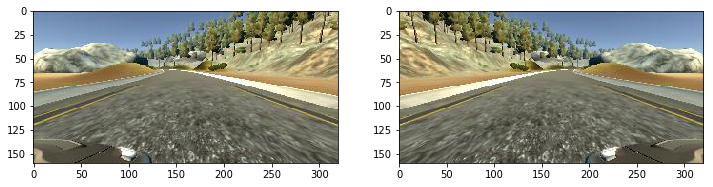

In [52]:
# Load img with keras/PIL
image = load_img(img_name)
image = np.asarray(image)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(image)

# Show flipped image
plt.subplot(1,2,2)
plt.imshow(cv2.flip(image, 1));

### Look at how `Cropping2D` will crop the image
(inspired by [this post](http://stackoverflow.com/questions/41925765/keras-cropping2d-changes-color-channel))

Let's see what the cropped images will look like...

(160, 320, 3)


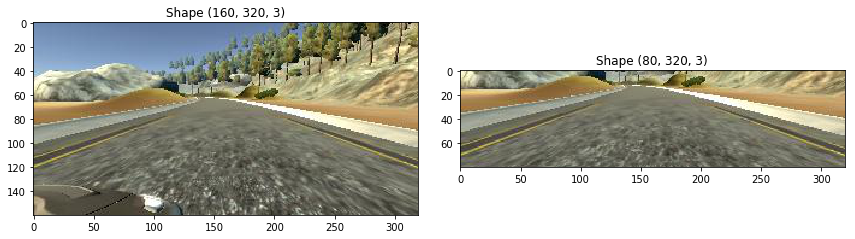

In [54]:
from keras import backend as K

def compare_images(left_image, right_image):    
    print(image.shape)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    f.tight_layout()
    ax1.imshow(left_image)
    ax1.set_title('Shape '+ str(left_image.shape))
    ax2.imshow(np.uint8(right_image))
    ax2.set_title('Shape '+ str(right_image.shape))
    plt.show()
    
# with a Sequential model
model = Sequential()
model.add(Cropping2D(cropping=((50,30), (0,0)), input_shape=(160,320,3)))
cropping_output = K.function([model.layers[0].input],
                                  [model.layers[0].output])

cropped_image = cropping_output([image[None,...]])[0]
compare_images(image, cropped_image.reshape(cropped_image.shape[1:]))

## Build keras model
Here are some resources used for ideas on implementing the network: 
- https://hackernoon.com/training-a-deep-learning-model-to-steer-a-car-in-99-lines-of-code-ba94e0456e6a
- https://chatbotslife.com/using-augmentation-to-mimic-human-driving-496b569760a9
- http://www.jessicayung.com/behavioural-cloning-tips-for-tackling-project-3/

Final implementation uses a model from CommaAI:
- https://github.com/commaai/research/blob/master/train_steering_model.py

In [12]:
# Image dimensions
ch, row, col = 3, 160, 320

# Create a model
model = Sequential()

# Preprocess incoming data, centered around zero with small standard deviation 
model.add(Lambda(lambda x: x/127.5 - 1.,
        input_shape=(row, col, ch),
        output_shape=(row, col, ch)))

# crop row pixels from top, bottom
CROP_TOP = 50
CROP_BOTTOM = 30
model.add(Cropping2D(cropping=((CROP_TOP,CROP_BOTTOM), (0,0)), input_shape=(row, col, ch)))

# Build model from CommaAI
model.add(Convolution2D(16, 8, 8, subsample=(4, 4), border_mode="same"))
model.add(ELU())
model.add(Convolution2D(32, 5, 5, subsample=(2, 2), border_mode="same"))
model.add(ELU())
model.add(Convolution2D(64, 5, 5, subsample=(2, 2), border_mode="same"))
model.add(Flatten())
model.add(Dropout(.2))
model.add(ELU())

model.add(Dense(512))
model.add(Dropout(.5))
model.add(ELU())
model.add(Dense(1))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 160, 320, 3)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
cropping2d_1 (Cropping2D)        (None, 80, 320, 3)    0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 20, 80, 16)    3088        cropping2d_1[0][0]               
____________________________________________________________________________________________________
elu_1 (ELU)                      (None, 20, 80, 16)    0           convolution2d_1[0][0]            
___________________________________________________________________________________________

## Train the network

In [57]:
# Run the model
EPOCH = 10
model.compile(loss='mse', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=1)
history = model.fit_generator(train_generator, samples_per_epoch=2*len(train_samples), callbacks=[early_stop], 
            validation_data=valid_generator, nb_val_samples=len(valid_samples), nb_epoch=EPOCH)

Epoch 1/10
12054/12054 [==============================] - 122s - loss: 1.8768 - val_loss: 0.0543
Epoch 2/10
12054/12054 [==============================] - 155s - loss: 0.0762 - val_loss: 0.0387
Epoch 3/10
12054/12054 [==============================] - 122s - loss: 0.0503 - val_loss: 0.0352
Epoch 4/10
12054/12054 [==============================] - 161s - loss: 0.0421 - val_loss: 0.0356
Epoch 5/10
12054/12054 [==============================] - 123s - loss: 0.0368 - val_loss: 0.0302
Epoch 6/10
12054/12054 [==============================] - 127s - loss: 0.0330 - val_loss: 0.0277
Epoch 7/10
12054/12054 [==============================] - 162s - loss: 0.0304 - val_loss: 0.0269
Epoch 8/10
12054/12054 [==============================] - 147s - loss: 0.0293 - val_loss: 0.0269
Epoch 9/10
12054/12054 [==============================] - 134s - loss: 0.0275 - val_loss: 0.0276
Epoch 10/10
12054/12054 [==============================] - 117s - loss: 0.0267 - val_loss: 0.0273


In [58]:
# save the model
filepath = './model.h5'
model.save(filepath)

## Plot training results

dict_keys(['val_loss', 'loss'])


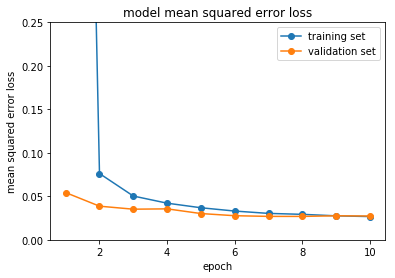

In [65]:
# print the keys contained in the history object
print(history.history.keys())

# plot the training and validation loss for each epoch
plt.plot(range(1,EPOCH+1), history.history['loss'], '-o')
plt.plot(range(1,EPOCH+1), history.history['val_loss'], '-o')
plt.ylim((0,.25))
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

## Save video of autonomous agent

In [ ]:
!python drive.py model.h5 run1

## Create video from images in `"/run1"`


In [ ]:
!python video.py run1 --fps 48

## Video playback of `run1.mp4`

In [69]:
from IPython.display import HTML
HTML("""
<video width="540" height="320" controls>
  <source src="{0}">
</video>
""".format('./run1.mp4'))

---
# SANDBOX
### Play with generators


In [27]:
''' Add my own training data
with open('../my-data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)
'''

def generator(samples, batch_size=32, augment=False):
    '''Use center camera only.'''
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []
            for batch_sample in batch_samples:
                center_angle = float(batch_sample[3])
                prob = np.random.rand()  # use for prob thresholding
                if center_angle < np.abs(.01):
                    if prob>0.25:  # skip imgs w/ low angle
                        continue
                
                if '_2017_' in batch_sample[0].split('/')[-1]:
                    name = '../my-data/IMG/'+batch_sample[0].split('/')[-1]
                else:
                    name = '../sample-data/IMG/'+batch_sample[0].split('/')[-1]
                center_image = cv2.imread(name)  # uncomment to load img as BGR        
                #center_image = load_img(name)  # uncomment to load as RGB
                #center_image = np.asarray(center_image)  # uncomment to load as RGB
                center_image = cv2.cvtColor(center_image, cv2.COLOR_BGR2HSV)
                
                images.append(center_image)
                angles.append(center_angle)
                
                #if (augment and prob>0.5):
                #    images.append(cv2.flip(center_image, 1))  # add flipped img
                #    angles.append(-center_angle)              # add reverse angle
    
            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(angles)
            yield shuffle(X_train, y_train)

In [71]:
train_samples_prob = sum(np.abs(train_angles_adj)!=0.25) + sum(np.abs(train_angles_adj)==0.25) * .25
train_samples_prob = int(train_samples_prob)
train_samples_prob

7170

In [72]:
def generator(samples, batch_size=32, augment=False):
    ''' Generate images and steering angle target
    Camera positions: center 0, left 1, right 2
    '''
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []
            for batch_sample in batch_samples:
                center_angle = float(batch_sample[3])
                prob = np.random.rand()  # use for prob thresholding
                if center_angle == 0:
                    if prob>0.25:  # skip imgs w/ low angle
                        continue
                
                name = '../sample-data/IMG/'+batch_sample[1].split('/')[-1]
                left_image = cv2.imread(name)  # load img as BGR        
                left_image = cv2.cvtColor(left_image, cv2.COLOR_BGR2HSV)                
                images.append(left_image)
                angles.append(center_angle+0.3)
                
                name = '../sample-data/IMG/'+batch_sample[2].split('/')[-1]
                right_image = cv2.imread(name)  # load img as BGR        
                right_image = cv2.cvtColor(right_image, cv2.COLOR_BGR2HSV)                
                images.append(right_image)
                angles.append(center_angle-0.4)
                
                #if (augment and prob>0.5):  # add flipped img, angle
                #    images.append(cv2.flip(center_image, 1))
                #    angles.append(-center_angle)
    
            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(angles)
            yield shuffle(X_train, y_train)


In [73]:
# Run the model
EPOCH = 10
model.compile(loss='mse', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=1)
history = model.fit_generator(train_generator, samples_per_epoch=train_samples_prob, callbacks=[early_stop], 
            validation_data=valid_generator, nb_val_samples=len(valid_samples), nb_epoch=EPOCH)

Epoch 1/10
7168/7170 [============================>.] - ETA: 0s - loss: 0.6638

/Users/jjl/anaconda/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


7232/7170 [==============================] - 72s - loss: 0.6582 - val_loss: 0.0386
Epoch 2/10
7190/7170 [==============================] - 69s - loss: 0.0481 - val_loss: 0.0290
Epoch 3/10
7232/7170 [==============================] - 69s - loss: 0.0392 - val_loss: 0.0279
Epoch 4/10
7190/7170 [==============================] - 68s - loss: 0.0337 - val_loss: 0.0260
Epoch 5/10
7232/7170 [==============================] - 69s - loss: 0.0330 - val_loss: 0.0270
Epoch 6/10
7190/7170 [==============================] - 81s - loss: 0.0306 - val_loss: 0.0255
Epoch 7/10
7190/7170 [==============================] - 78s - loss: 0.0283 - val_loss: 0.0278
Epoch 8/10
7232/7170 [==============================] - 86s - loss: 0.0281 - val_loss: 0.0256


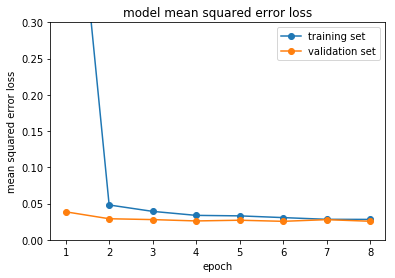

In [77]:
# plot the training and validation loss for each epoch
EPOCHS = 8  # change depending on early stopping
plt.plot(range(1,EPOCHS+1), history.history['loss'], '-o')
plt.plot(range(1,EPOCHS+1), history.history['val_loss'], '-o')
plt.ylim((0, 0.3))
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [78]:
# save the model
filepath = './model_alt.h5'
model.save(filepath)

### TODO: Build model from NVDIDIA
Inspired by:  
https://chatbotslife.com/learning-human-driving-behavior-using-nvidias-neural-network-model-and-image-augmentation-80399360efee


In [ ]:
def nvidia_model():
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5 - 1.,
        input_shape=(row, col, ch),
        output_shape=(row, col, ch)))
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), border_mode="valid"))
    model.add(ELU())
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), border_mode="valid"))
    model.add(ELU())
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), border_mode="valid"))
    model.add(ELU())
    model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode="valid"))
    model.add(ELU())
    model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode="valid"))
    model.add(ELU())
    model.add(Flatten())
    
    model.add(Dense(1164))
    model.add(ELU())
    model.add(Dense(100))
    model.add(ELU())
    model.add(Dense(50))
    model.add(ELU())
    model.add(Dense(10))
    model.add(ELU())
    model.add(Dense(1))
    
    return model

model = nvidia_model()

In [ ]:
# Run the model, 2 epochs
model.compile(loss='mse', optimizer='adam')
model.fit_generator(train_generator, samples_per_epoch=len(train_samples), 
            validation_data=validation_generator, 
            nb_val_samples=len(validation_samples), nb_epoch=2)

In [ ]:
# Save the model
filepath = './model.h5'
model.save(filepath)

### Use the saved model

In [ ]:
!python drive.py model.h5

---